# 1-Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 2-Get the data

In [2]:
path1 = './data/edustats.csv'
path2 = './data/edustats_indicators.csv'
path3 = './data/imo.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

df4 = pd.merge(df1, df2, on = 'Indicator.Code', how = 'outer')
df = pd.merge(df3, df4, on = 'Country.Name', how = 'outer')
df.dropna(how = 'any', inplace = True)
df.drop(['Indicator.Name'], axis = 1, inplace = True)

In [3]:
df.head()

,Country.Name,Mean.Rank,Indicator.Code,value
0,Albania,79.83,UIS.NERA.2,86.577433
1,Albania,79.83,UIS.NERA.2.F,86.026518
2,Albania,79.83,UIS.NERA.2.GPI,0.987608
3,Albania,79.83,UIS.NERA.2.M,87.103674
4,Albania,79.83,SE.PRM.TENR,93.175414


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185402 entries, 0 to 365619
Data columns (total 4 columns):
Country.Name      185402 non-null object
Mean.Rank         185402 non-null float64
Indicator.Code    185402 non-null object
value             185402 non-null float64
dtypes: float64(2), object(2)
memory usage: 7.1+ MB


In [5]:
df['Mean.Rank'].describe()

count    185402.000000
mean         53.879284
std          29.843445
min           1.630000
25%          26.750000
50%          51.750000
75%          79.290000
max         110.000000
Name: Mean.Rank, dtype: float64

## Geographical representation IMO scores of all the countries in our table using Tableau

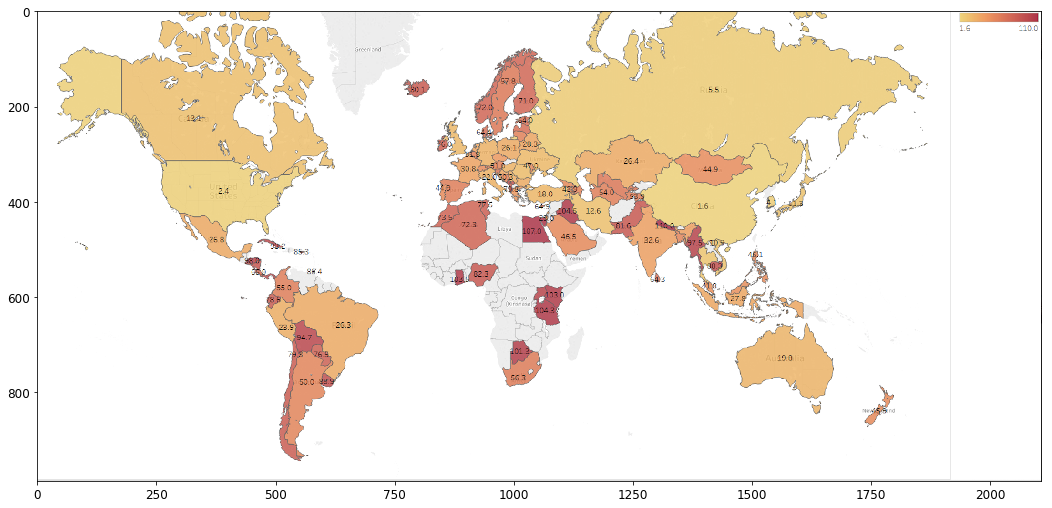

In [6]:
import matplotlib.image as mpimg
img=mpimg.imread('Tableau-IMO-Score-1.png')
plt.figure(figsize=(18,18))
imgplot = plt.imshow(img,filternorm=2)

## 2.1 Convert original dataset to operationable format using Pivot Table function in python

In [7]:
df_temp = df.pivot_table(index='Country.Name', columns='Indicator.Code', values='value').dropna(axis = 1, how = 'any')
df_temp.head()

Indicator.Code,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.GROW,SP.POP.TOTL
Country.Name,,,,,,
Albania,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06
Algeria,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07
Argentina,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07
Armenia,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06
Australia,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07


In [8]:
#merge information from Table_edustats and Table_imo using inner join
combine1 = pd.merge(df_temp, df3, left_index=True, right_on='Country.Name', how='inner')
combine1.head()

,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.GROW,SP.POP.TOTL,Country.Name,Mean.Rank
0,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06,Albania,79.83
1,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07,Algeria,72.33
2,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07,Argentina,50.00
3,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06,Armenia,43.88
4,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07,Australia,19.75


In [9]:
#change the columb order to make country.name at leftmost and mean.rank rightmost
combine1 = combine1[['Country.Name','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD',
                   'NY.GNP.MKTP.CD','NY.GNP.PCAP.CD','SP.POP.TOTL','SP.POP.GROW','Mean.Rank']]
combine1.head()

,Country.Name,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.TOTL,SP.POP.GROW,Mean.Rank
0,Albania,9.410937e+09,3189.768220,9.470301e+09,3157.333333,2.974934e+06,-0.478064,79.83
1,Algeria,1.317592e+11,3715.771082,1.291736e+11,3485.333333,3.458545e+07,1.569656,72.33
2,Argentina,3.302893e+11,8129.612822,3.211426e+11,7636.000000,3.998689e+07,1.062501,50.00
3,Armenia,7.091924e+09,2371.092082,7.411904e+09,2384.666667,3.006685e+06,-0.191634,43.88
4,Australia,9.086037e+11,41988.418643,8.780958e+11,38833.333333,2.111886e+07,1.432896,19.75


In [10]:
#remove the dot in column names making later analysis less painful
combine1= combine1.rename(index=str, columns={"Country.Name": "CName", 
                                               "NY.GDP.MKTP.CD": "GDPMKTP",
                                               "NY.GDP.PCAP.CD": "GDPPCAP",
                                               "NY.GNP.MKTP.CD": "GnpMKTP",
                                               "NY.GNP.PCAP.CD": "GnpPCAP",                                            
                                              "SP.POP.TOTL":"POPTotal",
                                              "SP.POP.GROW":"POPGrow"})
combine1.head()

,CName,GDPMKTP,GDPPCAP,GnpMKTP,GnpPCAP,POPTotal,POPGrow,Mean.Rank
0,Albania,9.410937e+09,3189.768220,9.470301e+09,3157.333333,2.974934e+06,-0.478064,79.83
1,Algeria,1.317592e+11,3715.771082,1.291736e+11,3485.333333,3.458545e+07,1.569656,72.33
2,Argentina,3.302893e+11,8129.612822,3.211426e+11,7636.000000,3.998689e+07,1.062501,50.00
3,Armenia,7.091924e+09,2371.092082,7.411904e+09,2384.666667,3.006685e+06,-0.191634,43.88
4,Australia,9.086037e+11,41988.418643,8.780958e+11,38833.333333,2.111886e+07,1.432896,19.75


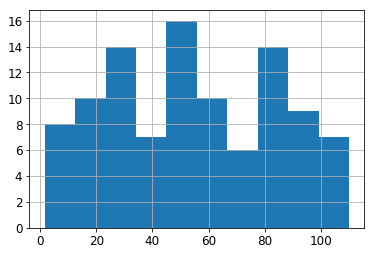

In [11]:
#Take a peek on how our target variable-Mean.Rank distributes
combine1['Mean.Rank'].hist()

In [12]:
combine1.describe()

,GDPMKTP,GDPPCAP,GnpMKTP,GnpPCAP,POPTotal,POPGrow,Mean.Rank
count,1.010000e+02,101.000000,1.010000e+02,101.000000,1.010000e+02,101.000000,101.000000
mean,5.253302e+11,15722.414863,5.257771e+11,14743.444988,5.889643e+07,0.898732,54.648416
std,1.561320e+12,20611.690676,1.581357e+12,18554.875495,1.776479e+08,0.947926,30.013872
min,3.087337e+09,440.885561,3.140551e+09,422.666667,3.539187e+04,-1.225695,1.630000
25%,2.289899e+10,2376.904759,2.234440e+10,2272.000000,4.676518e+06,0.189381,27.750000
50%,1.110890e+11,6312.645720,1.065114e+11,5586.666667,1.126882e+07,1.013378,52.380000
75%,3.302893e+11,23119.635934,3.269764e+11,21840.000000,4.442321e+07,1.495713,80.130000
max,1.379220e+13,113818.255193,1.398027e+13,90211.000000,1.316139e+09,3.301460,110.000000


## Obviously, variables such as GDPMKTP, GnpMKTP and POPTotal have much larger scale, which reminds us we might have to standardize them a bit for better fitting our models

In [13]:
combine1.columns

Index(['CName', 'GDPMKTP', 'GDPPCAP', 'GnpMKTP', 'GnpPCAP', 'POPTotal',
       'POPGrow', 'Mean.Rank'],
      dtype='object')

/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


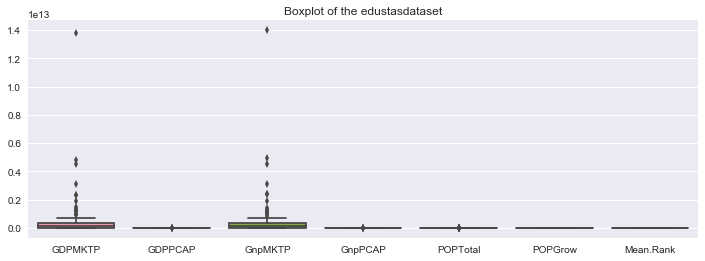

In [14]:
# Show the outliers
import seaborn as sns
plt.figure(figsize=(12,4))
plt.title('Boxplot of the edustasdataset')
sns.boxplot(combine1)

### Clearly, there are lots of outliers in variables GDPMKTP and GnpMKTP. There might be outliers in other variables but the Y axis is scaled up by the dominated variables GDPMKTP and GnpMKTP, which make the boxplot relatively not viewable.

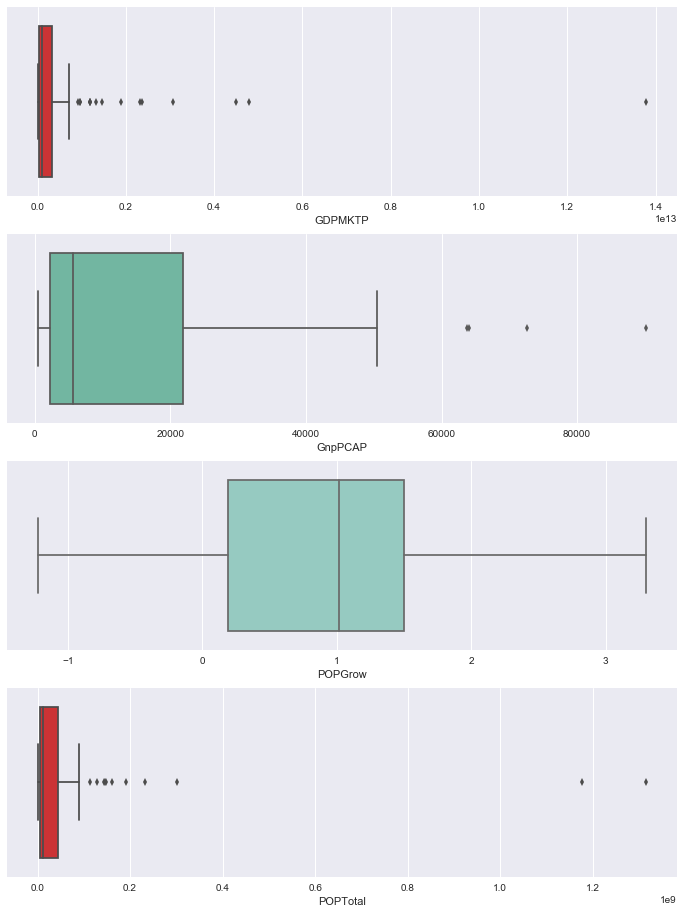

In [15]:
# 
fig, (ax1, ax2,ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(12,16))
sns.boxplot(y=combine1['GDPMKTP'], ax=ax1,orient="h", palette="Set1")
sns.boxplot(y=combine1['GnpPCAP'], ax=ax2,orient="h", palette="Set2")
sns.boxplot(y=combine1['POPGrow'], ax=ax3,orient="h", palette="Set3")
sns.boxplot(y=combine1['POPTotal'], ax=ax4,orient="h", palette="Set1")

## 2.2 VIF and Collinearity Check
Lessions learnt from before:

1) Multicollinearity is nearly always a problem in multiple regression models

2) Even small degrees of multicollinearity can cause serious problems for an analysis if you are interested in the effects of individual predictors

3) Small samples are particularly vulnerable to multicollinearity problems because multicollinearity reduces your effective sample size for the effects of individual predictors

4) There are no ‘easy’ solutions (e.g., dropping predictors is generally a bad idea)

In [16]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor    

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
vif["features"] = df_temp.columns
vif.round(1)

,VIF Factor,features
0,12932.1,NY.GDP.MKTP.CD
1,81.9,NY.GDP.PCAP.CD
2,12854.9,NY.GNP.MKTP.CD
3,84.4,NY.GNP.PCAP.CD
4,1.3,SP.POP.GROW
5,1.7,SP.POP.TOTL


## Based on the VIF number, we found there is collinearity that would severely distort model estimation

In [17]:
import seaborn as sns
combine1_copy = combine1.drop(["CName", "Mean.Rank"], axis=1)
train_int_name = combine1_copy.select_dtypes(include=['int64','float64']).columns.values
corr = combine1[train_int_name].corr()

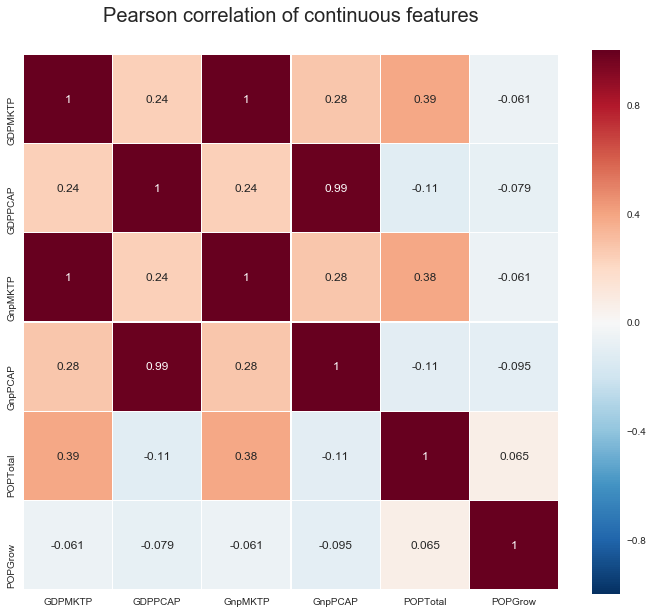

In [18]:
colormap = plt.cm.inferno
plt.figure(figsize=(12,10))
# ax.xaxis.set_label_position('top') 
plt.title('Pearson correlation of continuous features', y=1.05, size=20)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

### It is clearly GDPMKTP-GnpMKTP and GDPPCAP-GnpPCAP pairs are highly correlated

In [19]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
# transformer.transform(combine1.iloc[:,1:])
combine1.iloc[:,1:6] = transformer.transform(combine1.iloc[:,1:6])
combine1.fillna(0, inplace=True)
# scaled_df = scaleColumns(combine1,['GDPMKTP','GnpMKTP'])
# combine1=scaler.transform(combine1)
# combine1['MKTP'] = combine1.apply(lambda row: ((row['GDPMKTP']) + (row['GnpMKTP'])/2, axis=1))
combine1.head()

,CName,GDPMKTP,GDPPCAP,GnpMKTP,GnpPCAP,POPTotal,POPGrow,Mean.Rank
0,Albania,22.965138,8.068017,22.971426,8.057800,14.905733,-0.478064,79.83
1,Algeria,25.604242,8.220611,25.584423,8.156606,17.358944,1.569656,72.33
2,Argentina,26.523235,9.003392,26.495151,8.940760,17.504062,1.062501,50.00
3,Armenia,22.682223,7.771528,22.726353,7.777234,14.916349,-0.191634,43.88
4,Australia,27.535175,10.645173,27.501022,10.567060,16.865677,1.432896,19.75


## Here I use np.log1p function to logtransform the variables in column 1-6(GDPMKTP to POPTotal). We can include polynomial terms after using logtransfrom since every coefficient of the transformed variables is an exponential term. I do not perform logtransform on POPGrow since it has negative values and distributed well without any outliers(seen from boxplot). There is no necessary to do transform on target variable: Mean.Rank, thus I leave it as is

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

X = combine1.drop(['CName', 'Mean.Rank'], axis = 1).values
y = combine1['Mean.Rank'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
ridgereg = Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, max_iter = 10000000, random_state=2))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, max_iter = 10000000, l1_ratio=.9, random_state=3))
RF = RandomForestRegressor(min_samples_split = 30, 
                             max_leaf_nodes = 15, 
                             n_estimators = 30, 
                             max_depth = 5,
                             min_samples_leaf = 3)
GBoost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =4)
XGBoost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
LGBoost = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

clfs = {'linreg': linreg, 
        'ridgereg': ridgereg, 
        'lasso': lasso, 
        'ENet': ENet,
        'RF': RF,
        'GBoost': GBoost,
        'XGBoost': XGBoost,
        'LGBoost': LGBoost}

res1 = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    res1.append([name, mean_squared_error(ypred, y_test)])
    
res1_score = pd.DataFrame(np.array(res1).reshape(8,2), columns = ['clf', 'clf_mse'])
res1_score['clf_mse'] = res1_score['clf_mse'].astype(float)
res1_score.sort_values('clf_mse')

,clf,clf_mse
0,linreg,364.653501
2,lasso,365.118981
3,ENet,401.082101
6,XGBoost,415.873150
1,ridgereg,422.056338
7,LGBoost,492.415536
5,GBoost,524.278534
4,RF,651.862252


array([ 57.6,  94. ,  99.9,  99.9,  99.9,  99.9])

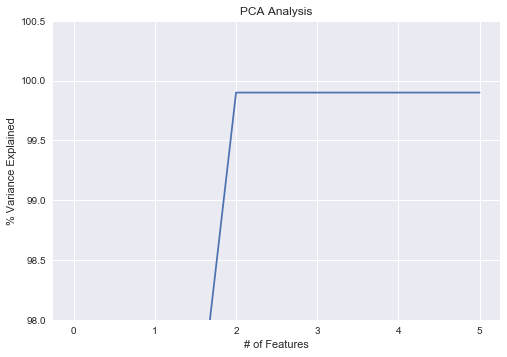

In [22]:
# find the n_compoents
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 6)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(98,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)
var

In [23]:
n_components = 4

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clfs2 = {'linreg': linreg,
        'ridgereg': ridgereg, 
        'lasso': lasso,
        'ENet': ENet,
        'RF': RF,
        'GBoost': GBoost,
        'XGBoost': XGBoost}
#         'LGBoost': LGBoost # due to dimensions requirement cannot meet in lgbboost, I drop the LGBoost model this time


res2 = []
for name, clf in clfs2.items():
    clf.fit(X_train_pca,y_train)
    ypred = clf.predict(X_test_pca)
    res2.append([name, mean_squared_error(ypred, y_test)])
    
res2_score = pd.DataFrame(np.array(res2).reshape(7,2), columns = ['clf', 'clf_mse'])
res2_score['clf_mse'] = res2_score['clf_mse'].astype(float)
res2_score.sort_values('clf_mse')

,clf,clf_mse
2,lasso,432.383244
0,linreg,432.383496
3,ENet,432.393136
1,ridgereg,432.957620
5,GBoost,564.332707
4,RF,621.095013
6,XGBoost,688.618172


# Use more features and set the thresh 50 for 101 countries

In [24]:
na_thresh = np.arange(0, 100, 10)

def mse_thresh(thresh):
    df_temp = df.pivot_table(index='Country.Name', 
                              columns='Indicator.Code', 
                              values='value'
                             ).dropna(axis = 1, thresh = thresh)
    combine = pd.merge(df_temp, df3, left_index=True, right_on='Country.Name', how='inner')
    X = combine.drop(['Country.Name', 'Mean.Rank'], axis = 1).values
    y = combine['Mean.Rank'].values
    
    print('the threshold of NA: {0: 4d}, the number of columns: {1: 4d}'.format(thresh, X.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    res = []
    clfs = {
            'XGBoost': XGBoost,
            'LGBoost': LGBoost}

    for name, clf in clfs.items():
        clf.fit(X_train,y_train)
        ypred = clf.predict(X_test)
        res.append([name, mean_squared_error(ypred, y_test)])

    res_score = pd.DataFrame(np.array(res).reshape(2,2), columns = ['clf', 'clf_mse'])
    res_score['clf_mse'] = res_score['clf_mse'].astype(float)
    print(res_score.sort_values(['clf_mse'], ascending = True))

for thresh in na_thresh:
    mse_thresh(thresh)

the threshold of NA:    0, the number of columns:  3171
       clf     clf_mse
1  LGBoost  382.117789
0  XGBoost  462.570615
the threshold of NA:   10, the number of columns:  2738
       clf     clf_mse
1  LGBoost  432.642627
0  XGBoost  507.387883
the threshold of NA:   20, the number of columns:  2432
       clf     clf_mse
1  LGBoost  406.563465
0  XGBoost  424.884122
the threshold of NA:   30, the number of columns:  2205
       clf     clf_mse
1  LGBoost  407.057064
0  XGBoost  500.219441
the threshold of NA:   40, the number of columns:  2003
       clf     clf_mse
0  XGBoost  415.847061
1  LGBoost  436.854535
the threshold of NA:   50, the number of columns:  1822
       clf     clf_mse
1  LGBoost  413.994170
0  XGBoost  515.914811
the threshold of NA:   60, the number of columns:  1774
       clf     clf_mse
0  XGBoost  441.507370
1  LGBoost  456.514154
the threshold of NA:   70, the number of columns:  1625
       clf     clf_mse
1  LGBoost  389.105272
0  XGBoost  399.480733


# ~~~~~~~~~~~~~~~~~~~~~ Question 2 ~~~~~~~~~~~~~~~~~~~~~

In [25]:
#try to predict mean rank of a country is less than 10, in between 10 and 30, and so on.
#First, resacle the Mean.Rank to class 1=(0=<MR<10),2=(10=<MR<30),3=(30=<MR<50),4=(50=<MR<70) until 6=(90=<MR<110)
#In order to make sure the left boundry is inclusive (say if meankrank=50, class should be 4), I add 10.000000001 
#to the MeanRank to make the split at 0,20),[20,40), [40,60),and so on.

import math
df_temp = df.pivot_table(index='Country.Name', 
                          columns='Indicator.Code', 
                          values='value'
                         ).dropna(axis = 1)
combine = pd.merge(df_temp, df3, left_index=True, right_on='Country.Name', how='inner')
combine['Mean.Rank']=combine.apply(lambda row: math.ceil((10.000000001+row['Mean.Rank'])/20), axis=1)
combine.head()

,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.GROW,SP.POP.TOTL,Country.Name,Mean.Rank
0,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06,Albania,5
1,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07,Algeria,5
2,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07,Argentina,4
3,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06,Armenia,3
4,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07,Australia,2


We already know form previous head information such as: MeanRank of Argentina =50.00000. Now we see the label is 4. The lable can be also checked on Albania. So, we successfully encode the MeanRank.

In [26]:
X = combine.drop(['Country.Name', 'Mean.Rank'], axis = 1).values
y = combine['Mean.Rank'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import classification_report_imbalanced
from collections import defaultdict

estimators = {'RandomForest':RandomForestClassifier(),'AdaBoost': AdaBoostClassifier(), 'Extra Tree': ExtraTreesClassifier()}
clfs = defaultdict(str)

for name,clf in estimators.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(name + '_clf')
    print(classification_report_imbalanced(y_test, y_pred))
    clfs[name+'_clf'] = clf

RandomForest_clf
                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      0.96      0.00      0.00      0.00         3
          2       0.45      0.62      0.67      0.53      0.60      0.35         8
          3       0.00      0.00      0.83      0.00      0.00      0.00         3
          4       0.20      0.50      0.83      0.29      0.44      0.18         2
          5       0.50      0.17      0.95      0.25      0.63      0.38         6
          6       0.67      0.50      0.95      0.57      0.78      0.59         4

avg / total       0.37      0.35      0.84      0.33      0.48      0.30        26

AdaBoost_clf
                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00         3
          2       0.44      0.50      0.72      0.47      0.58      0.33         8
          3       0.00      0.00      1.00      0.00 

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/imblearn/metrics/classification.py:244: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
